<a href="https://colab.research.google.com/github/jusscarrascosa/imageprocessing/blob/main/mammography_image_processing2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparative Analysis of Mammograms**

In this project, I focused on advanced mammography image preprocessing and analysis. The goal was to enhance the quality of the images by filtering noise, perform geometric corrections for spatial alignment, and analyze structural differences through pixel-wise comparison. Additionally, I built a composite RGB image using different processing stages as color channels — a common visualization technique in medical image analysis.


---


*En este proyecto, me enfoqué en el preprocesamiento y análisis avanzado de imágenes mamográficas. El objetivo fue mejorar la calidad de las imágenes mediante el filtrado de ruido, realizar correcciones geométricas para su alineación espacial y analizar diferencias estructurales a través de una comparación píxel a píxel. Además, construí una imagen RGB compuesta utilizando diferentes etapas del procesamiento como canales de color, una técnica común en el análisis de imágenes médicas.*

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from scipy import signal

The first step involved converting both mammograms to grayscale and performing a comparative analysis based on their size, orientation, and noise characteristics. Grayscale conversion is essential to focus on structural and density information, which are critical for medical interpretation.

From the analysis, Mamo1 is larger in the vertical (y) dimension compared to Mamo2 (by about 1900 pixels). Orientation-wise, Mamo1 is vertically aligned, while Mamo2 shows a 45° inclination. Additionally, Mamo2 exhibits noticeable salt-and-pepper noise — a common artifact in medical imaging caused by acquisition or transmission errors.


---


*El primer paso consistió en convertir ambas mamografías a escala de grises y realizar un análisis comparativo considerando su tamaño, orientación y características de ruido. La conversión a escala de grises es fundamental para centrarse en la información estructural y de densidad, elementos clave en la interpretación médica.*

*Del análisis se observa que Mamo1 es más grande en el eje vertical (y) en comparación con Mamo2 (con una diferencia aproximada de 1900 píxeles). En cuanto a la orientación, Mamo1 está alineada verticalmente, mientras que Mamo2 presenta una inclinación de 45°. Además, Mamo2 presenta un ruido tipo “sal y pimienta”, un artefacto común en imágenes médicas causado por errores de adquisición o transmisión.*

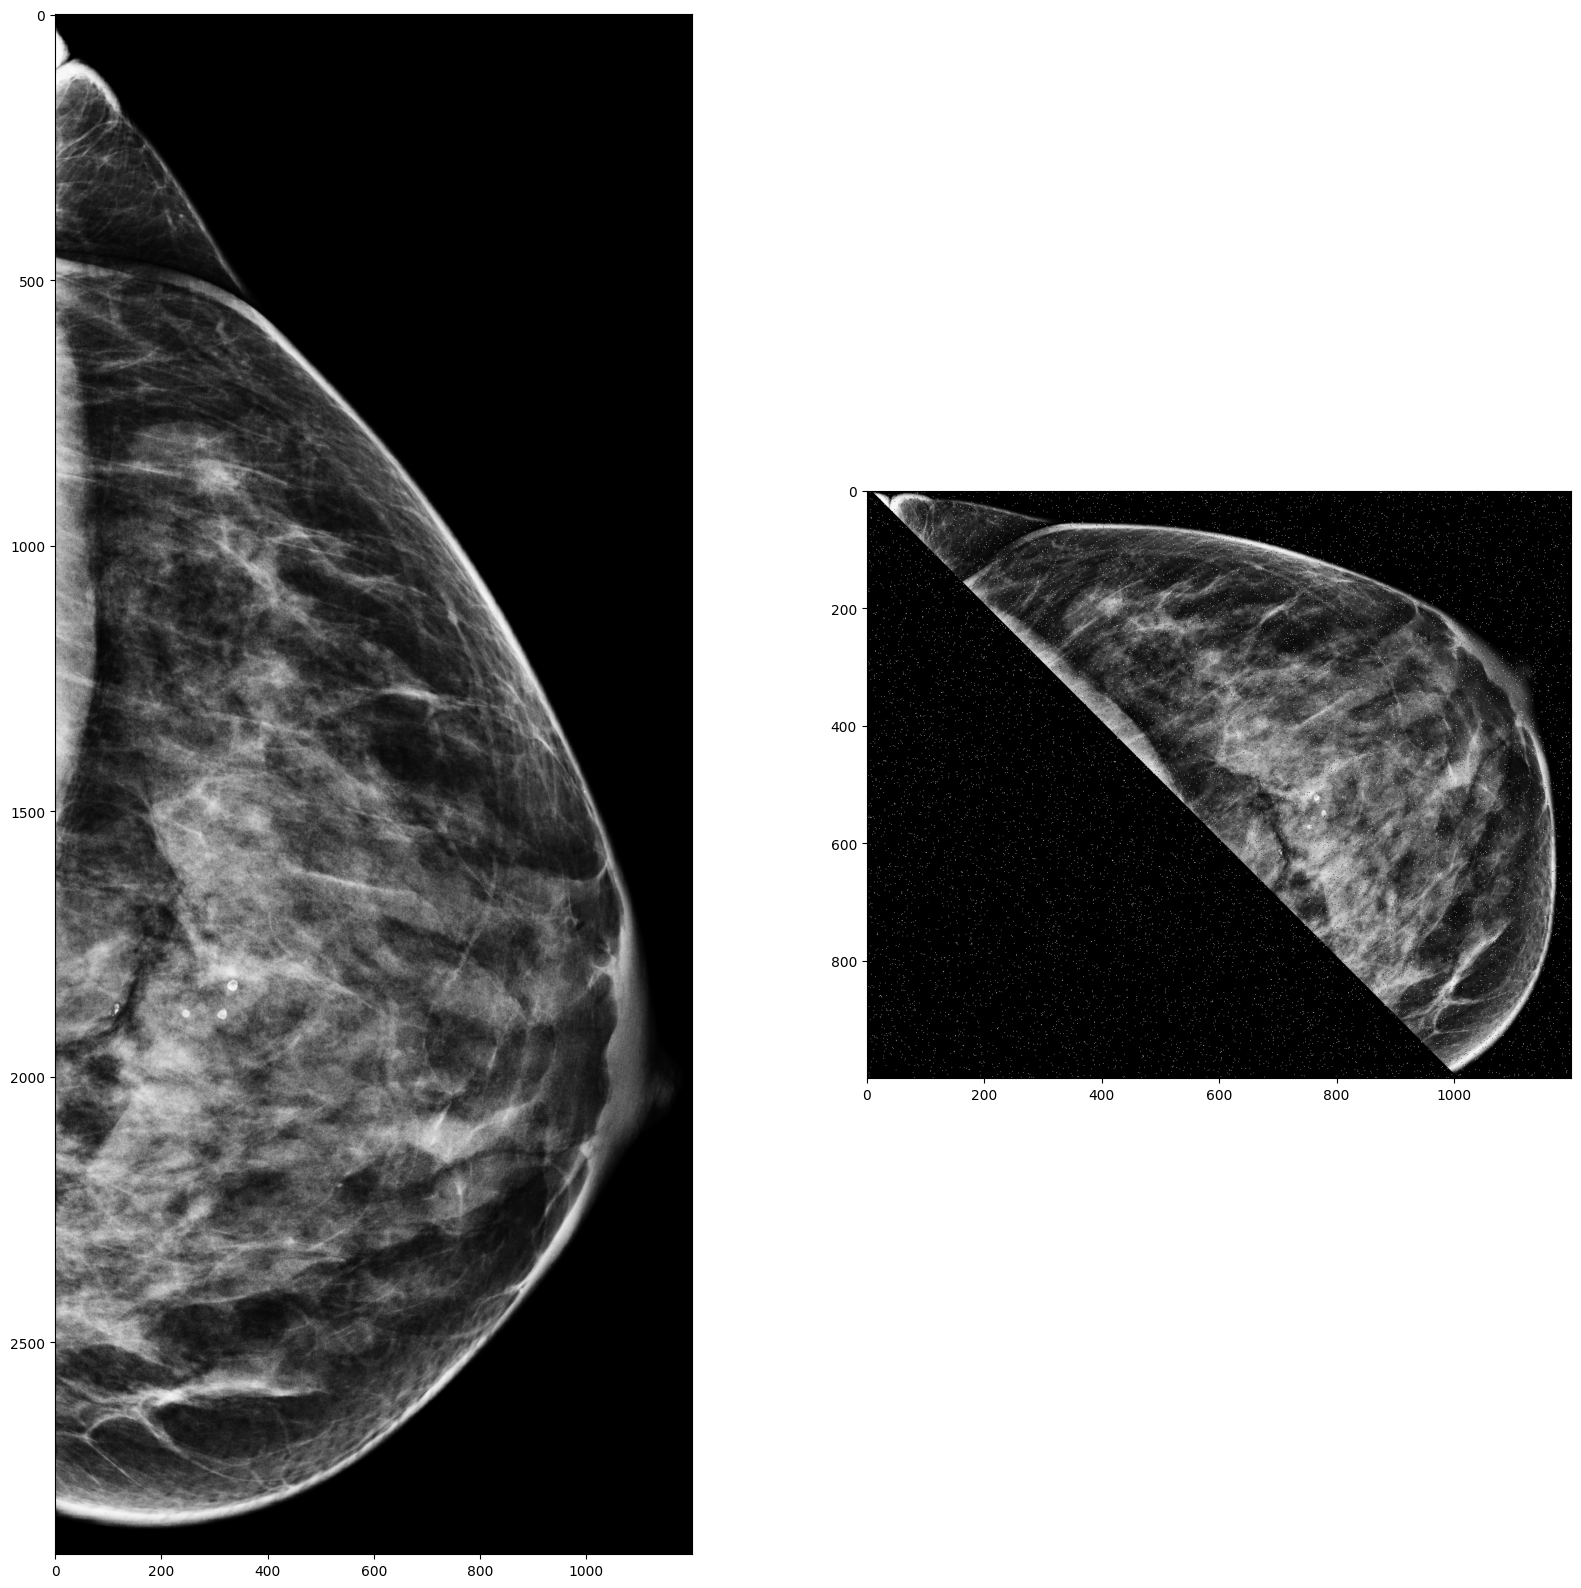

Las dimensiones de la Mamografia 1 son (2900, 1200) y su tipo de dato es uint8
Las dimensiones de la Mamografia 2 son (1000, 1200) y su tipo de dato es uint8


In [ ]:
mamo1= cv2.imread('Mamo1.png',0)
mamo2= cv2.imread('Mamo2 (1).png',0)
fig, axs = plt.subplots (1,2, figsize=(20,20))
axs[0].imshow(mamo1,cmap='gray')
axs[1].imshow(mamo2,cmap='gray')
plt.show()
print('Las dimensiones de la Mamografia 1 son', mamo1.shape, 'y su tipo de dato es', mamo1.dtype)
print('Las dimensiones de la Mamografia 2 son', mamo2.shape, 'y su tipo de dato es', mamo2.dtype)

To address the noise in Mamo2, I applied a median filter, an effective technique for removing salt-and-pepper noise by replacing each pixel with the median of its neighbors. This preserves edges while attenuating noise.

After noise reduction, I rotated Mamo2 by -45° around pixel (0,0) within a larger canvas to prevent data loss. Then, I cropped the relevant region and resized it to match Mamo1’s dimensions. This alignment is crucial for accurate pixel-by-pixel comparison in later stages.


---

*Para tratar el ruido presente en Mamo2, apliqué un filtro de mediana, una técnica eficaz para eliminar el ruido de tipo sal y pimienta sustituyendo cada píxel por la mediana de sus vecinos. Esto permite atenuar el ruido preservando los bordes.*

*Tras reducir el ruido, roté Mamo2 -45° alrededor del píxel (0,0) dentro de un lienzo más grande para evitar pérdida de información. Luego recorté la región relevante y la redimensioné para que coincidiera con las dimensiones de Mamo1. Esta alineación es fundamental para permitir una comparación precisa píxel a píxel en etapas posteriores.*

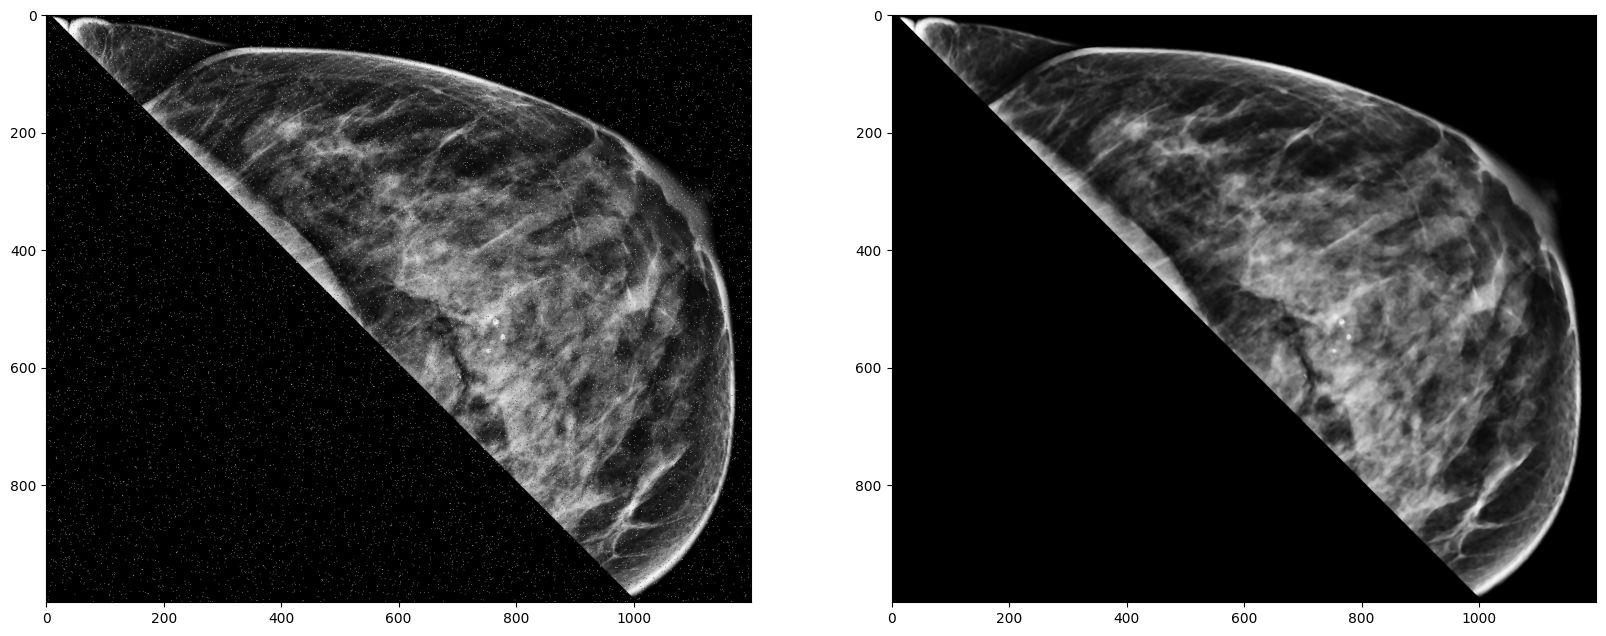

In [ ]:
#Filtro Median Blur
mamo2fil= cv2.medianBlur(mamo2,5)
fig, axs = plt.subplots (1,2, figsize=(20,20))
axs[0].imshow(mamo2,cmap='gray')
axs[1].imshow(mamo2fil,cmap='gray')
plt.show()

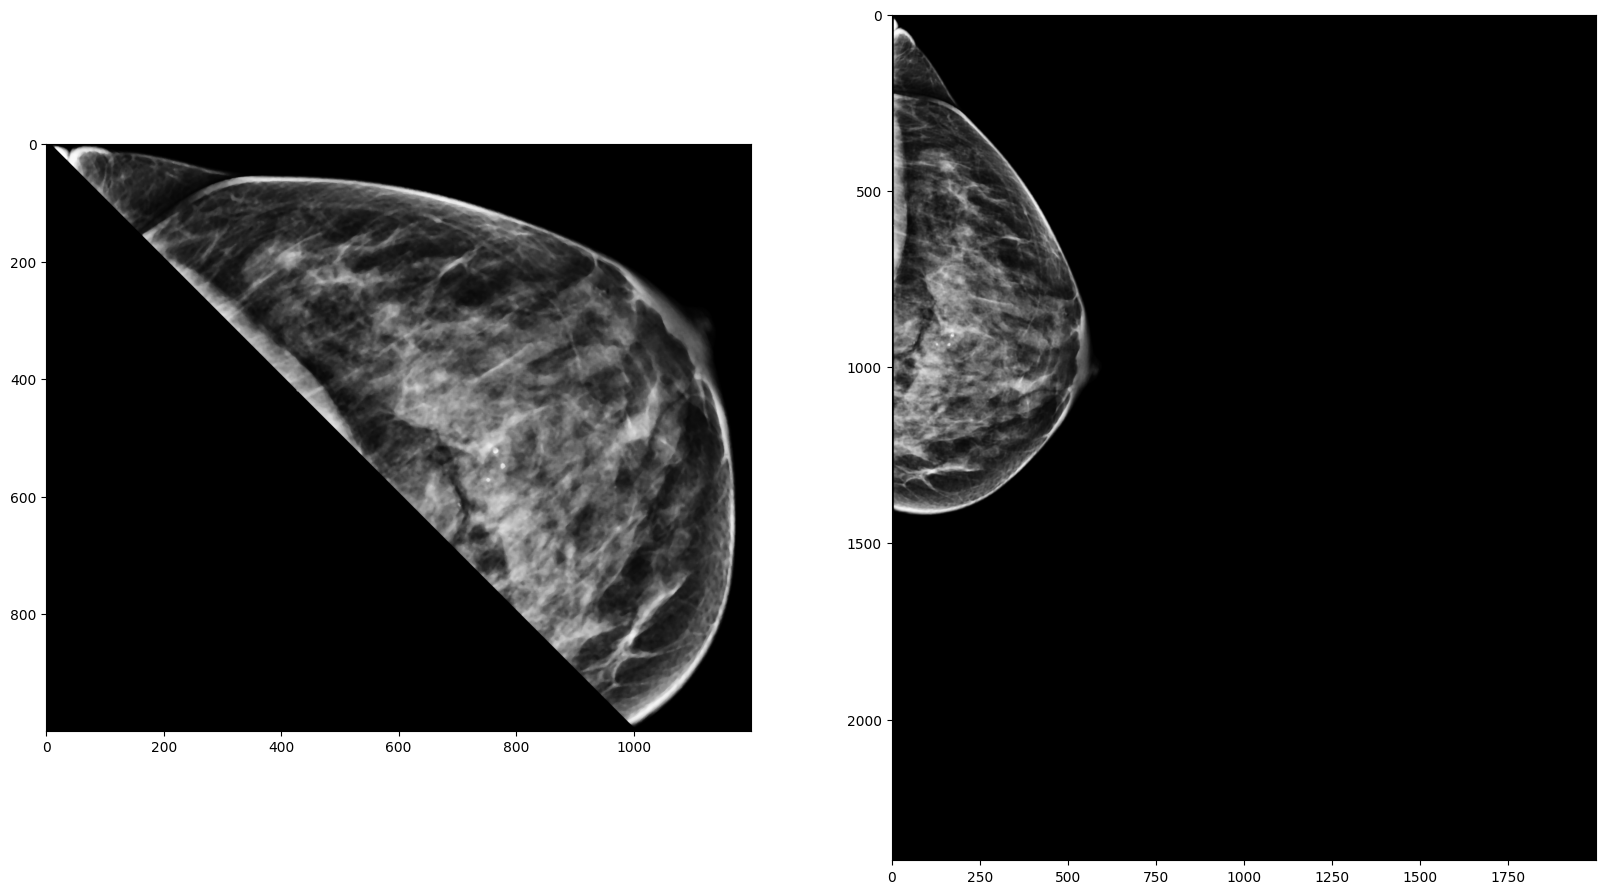

In [ ]:
#Ahora la orientamos verticalmente como la Mamografia 1
ancho, alto = mamo2fil.shape
matriz_rotacion = cv2.getRotationMatrix2D((0,0), -45, 1)
mamo2_rotada = cv2.warpAffine(mamo2fil, matriz_rotacion, (ancho*2, alto*2))
fig, axs = plt.subplots (1,2, figsize=(20,20))
axs[0].imshow(mamo2fil,cmap='gray')
axs[1].imshow(mamo2_rotada,cmap='gray')
plt.show()

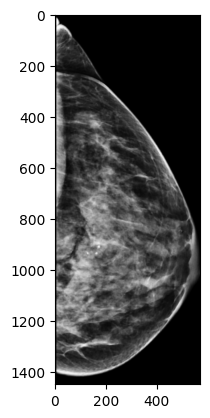

In [ ]:
zoommamo2= mamo2_rotada[0:1450, 0:570]
plt.imshow(zoommamo2, cmap='gray')
plt.show()

Las dimensiones de la Mamografia despues de transformarla son (2900, 1200) . Diferentes a la de la Mamografia 2 original que era (1000, 1200)


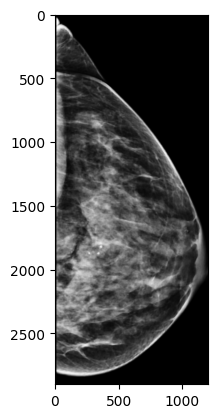

In [ ]:
mamo2actual=cv2.resize(zoommamo2,(1200,2900))
print('Las dimensiones de la Mamografia despues de transformarla son', mamo2actual.shape, '. Diferentes a la de la Mamografia 2 original que era', mamo2.shape)
plt.imshow(mamo2actual, cmap='gray')
plt.show()

Once both images were spatially aligned, I computed a difference image by subtracting them pixel by pixel (in absolute value to avoid negative intensities). The resulting heatmap highlights areas with significant differences.

Regions with values close to 0 indicate high similarity, while higher intensity regions (closer to 255) reflect notable differences, particularly within the breast tissue. Some of these differences may be due to noise filtering artifacts or slight structural variations inherent to the acquisition.


---
*Una vez alineadas espacialmente ambas imágenes, calculé una imagen diferencia restándolas píxel a píxel (en valor absoluto para evitar intensidades negativas). El mapa resultante resalta las áreas con diferencias significativas.*
*Las regiones con valores cercanos a 0 indican alta similitud, mientras que las áreas de alta intensidad (cercanas a 255) reflejan diferencias notables, especialmente dentro del tejido mamario. Algunas de estas diferencias pueden deberse a artefactos del filtrado de ruido o a variaciones estructurales inherentes a la adquisición.*

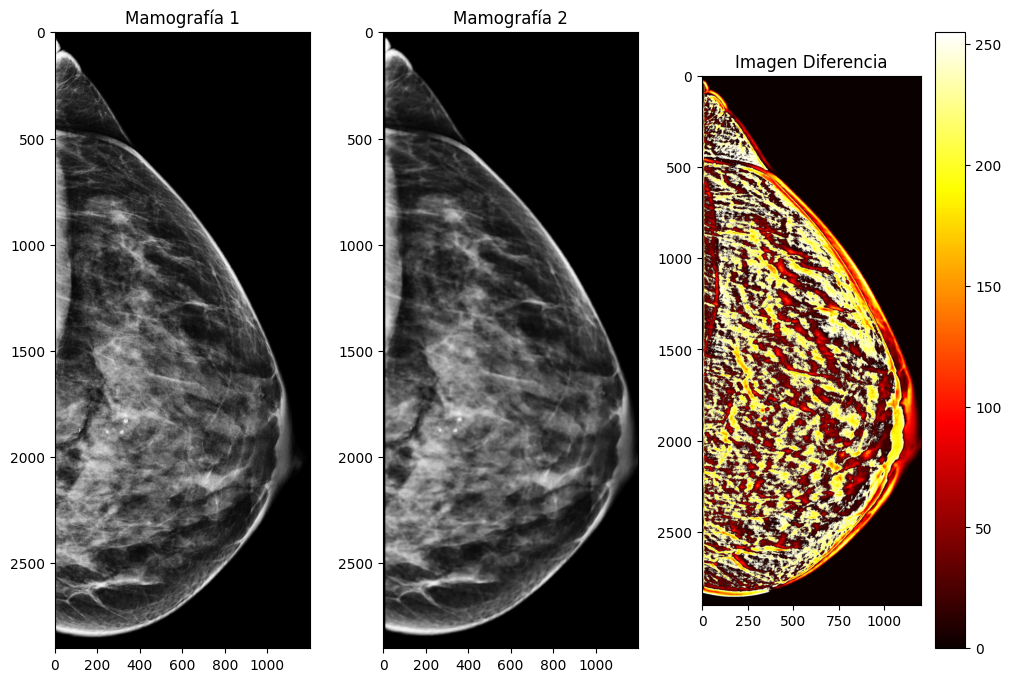

In [ ]:
imagen_diferencia = abs (mamo2actual - mamo1)
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Mamografía 1")
plt.imshow(mamo1, cmap='gray')
plt.subplot(1, 3, 2)
plt.title("Mamografía 2")
plt.imshow(mamo2actual, cmap='gray')
plt.subplot(1, 3, 3)
plt.title("Imagen Diferencia")
plt.imshow(imagen_diferencia, cmap='hot')
plt.colorbar()
plt.show()

As a final step, I created an RGB composite image to visualize different data layers simultaneously. The red channel was assigned a blank image (zeros), the green channel contained the reference image (Mamo1), and the blue channel held the processed image (Mamo2). This type of visualization is useful for identifying overlapping regions and areas of divergence between the two images.


---

*Como último paso, creé una imagen compuesta RGB para visualizar simultáneamente diferentes capas de información. El canal rojo se asignó a una imagen vacía (ceros), el canal verde contuvo la imagen de referencia (Mamo1) y el canal azul la imagen procesada (Mamo2). Este tipo de visualización es útil para identificar regiones superpuestas y áreas de divergencia entre ambas imágenes.*

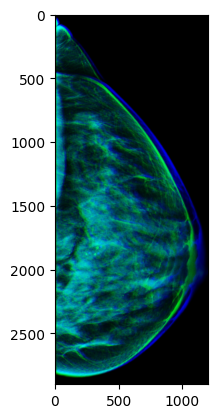

In [ ]:
capa_roja = np.zeros(mamo1.shape)
capa_verde = mamo1
capa_azul = mamo2actual
capa_roja = capa_roja.astype(np.uint8)
capa_verde = capa_verde.astype(np.uint8)
capa_azul = capa_azul.astype(np.uint8)
imagen_rgb = cv2.merge([capa_azul, capa_verde, capa_roja])
plt.imshow(cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB))
plt.show()

This project demonstrates essential image processing techniques applied to mammography: noise filtering, geometric alignment, pixel-level comparison, and multi-channel visualization. These techniques form the foundation of computer-aided diagnosis systems and can be further extended with segmentation, feature extraction, or machine learning models to support clinical decision-making.


---

*Este proyecto demuestra técnicas esenciales de procesamiento de imágenes aplicadas a mamografías: filtrado de ruido, alineación geométrica, comparación a nivel de píxel y visualización multicanal. Estas técnicas constituyen la base de los sistemas de diagnóstico asistido por computadora y pueden ampliarse con segmentación, extracción de características o modelos de aprendizaje automático para apoyar la toma de decisiones clínicas.*